# EDA & Preprocessing

In [90]:
import pandas as pd
import numpy as np
import json
from lxml.html import parse
from urllib.request import urlopen
from io import StringIO

# 2. Data wrangling: clean, transform, merge, reshape

## 실습내용 요약
- Combining and merging data sets
- Reshaping and pivoting
- Data transformation
- String manipulation

## Combining and merging data sets

### Review
- pd.merge: 2개의 dataframe을 key를 활용해 병합하는 방법
    - pd.merge의 'how' argument로 left, right, outer, inner를 활용 가능
        - left: use keys from left frame only
        - right: use keys from right frame only
        - outer: use union of keys from both frames
        - inner: use intersection of keys from both frames
- pd.concat: 2개 이상의 dataframe을 axis를 활용해 병합하는 방법
    - 

### pd.merge

아래 주어진 2개의 dataframe을 pd.merge를 활용해 병합하시오.

In [5]:
df1 = pd.DataFrame({'data1': [0, 1, 2, 3, 4, 5, 6],
                    'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b']})
df2 = pd.DataFrame({'data2': [0, 1, 2],
                    'key': ['a', 'b', 'd']})

In [8]:
pd.merge(df1, df2)

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [4]:
pd.merge(df1, df2, on='key')

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


아래 주어진 2개의 dataframe을 key1과 key2를 함께 고려하여 병합하시오. 또한, how argument 4가지를 변경하며 결과를 비교하시오.

In [53]:
df1 = pd.DataFrame({'data1': [0, 1, 2, 3, 4, 5, 6],
                    'key1': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'key2': ['a', 'a', 'b', 'c', 'c', 'c', 'd']})
df2 = pd.DataFrame({'data2': [0, 1, 2],
                    'key1': ['a', 'b', 'd'],
                    'key2': ['b', 'a', 'a']})

In [54]:
pd.merge(df1, df2).sort_values(lambda x: )

,data1,key1,key2,data2
0,0,b,a,1
1,1,b,a,1
2,2,a,b,0


In [56]:
df1['sort_order'] = [i for i in range(len(df1))]
df1

,data1,key1,key2,sort_order
0,0,b,a,0
1,1,b,a,1
2,2,a,b,2
3,3,c,c,3
4,4,a,c,4
5,5,a,c,5
6,6,b,d,6


In [21]:
pd.merge(df1, df2, how='outer')

,data1,key1,key2,data2
0,0.0,b,a,1.0
1,1.0,b,a,1.0
2,2.0,a,b,0.0
3,3.0,c,c,NaN
4,4.0,a,c,NaN
5,5.0,a,c,NaN
6,6.0,b,d,NaN
7,NaN,d,a,2.0


In [16]:
print('------------left------------')
print(pd.merge(df1, df2, how='left'))
print('-----------right------------')
print(pd.merge(df1, df2, how='right'))
print('-----------outer------------')
print(pd.merge(df1, df2, how='outer'))
print('-----------inner------------')
print(pd.merge(df1, df2, how='inner'))

------------left------------
   data1 key1 key2  data2
0      0    b    a    1.0
1      1    b    a    1.0
2      2    a    b    0.0
3      3    c    c    NaN
4      4    a    c    NaN
5      5    a    c    NaN
6      6    b    d    NaN
-----------right------------
   data1 key1 key2  data2
0    0.0    b    a      1
1    1.0    b    a      1
2    2.0    a    b      0
3    NaN    d    a      2
-----------outer------------
   data1 key1 key2  data2
0    0.0    b    a    1.0
1    1.0    b    a    1.0
2    2.0    a    b    0.0
3    3.0    c    c    NaN
4    4.0    a    c    NaN
5    5.0    a    c    NaN
6    6.0    b    d    NaN
7    NaN    d    a    2.0
-----------inner------------
   data1 key1 key2  data2
0      0    b    a      1
1      1    b    a      1
2      2    a    b      0


### pd.concat

- 아래 주어진 3개의 series를 concat하시오.
- 아래 주어진 3개의 series를 오른쪽으로 concat하시오.
- concat하는 series에 key를 부여하고, concat한 결과에서 key를 활용해 s2를 추려내시오.

In [24]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])

In [25]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [32]:
df = pd.concat([s1, s2, s3], axis=1)
df.columns = ['a' , 'b', 'c']
df

,a,b,c
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [31]:
df_temp = pd.concat([s1, s2, s3], keys=['1', '2', '3'])
print(df_temp)
print(df_temp['1'])

1  a    0
   b    1
2  c    2
   d    3
   e    4
3  f    5
   g    6
dtype: int64
a    0
b    1
dtype: int64


아래 df1,2,3,4가 주어져 있다. df1과 df4를 concat 함수를 활용해 inner join(앞에서 배운 inner 병합)하시오.

In [37]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']}, index=[0, 1, 2, 3])
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']}, index=[4, 5, 6, 7])
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']}, index=[8, 9, 10, 11])
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']}, index=[2, 3, 6, 7])

In [41]:
print(df1)
print(df4)

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
    B   D   F
2  B2  D2  F2
3  B3  D3  F3
6  B6  D6  F6
7  B7  D7  F7


In [269]:
pd.concat([df1, df4], axis=1, join='inner')

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [270]:
# 아래로 병합하는 경우
pd.concat([df1, df4], join='inner')

,B,D
0,B0,D0
1,B1,D1
2,B2,D2
3,B3,D3
2,B2,D2
3,B3,D3
6,B6,D6
7,B7,D7


### Exercise
- 주어진 df1,2,3를 concat하시오.
- 주어진 df1,2,3를 오른쪽으로 concat하시오.
- concat하는 dataframe에 key를 부여하고, concat한 결과에서 key를 활용해 df2를 추려내시오. (Series가 아닌 dataframe에 주의)
- df1과 df4를 concat 함수를 활용해 outer join하시오.

#### Solution

In [52]:
frames = [df1, df2, df3]
df_d = pd.concat([df1, df4], axis=1, join='outer')
df_d

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


## Reshaping and pivoting

Reshaping simple example

In [2]:
import pandas as pd

In [3]:
data = pd.DataFrame({'one': [0, 3],
                       'two': [1, 4],
                       'three': [2, 5]}, columns=pd.Index(["one", "two", "three"], name="number"),
                     index=pd.Index(['Ohio', 'Colorado'], name="state"))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [17]:
result = data.stack()
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64

In [18]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [19]:
result.unstack().unstack()

number  state   
one     Ohio        0
        Colorado    3
two     Ohio        1
        Colorado    4
three   Ohio        2
        Colorado    5
dtype: int64

In [9]:
k.loc['one']

state
Ohio        0
Colorado    3
dtype: int64

In [63]:
result.unstack(0)
# result.unstack(1)

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [65]:
# result.unstack('state')
result.unstack('number')

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


### Exercise
- 주어진 df를 활용해, 아래와 같은 결과를 도출하시오.
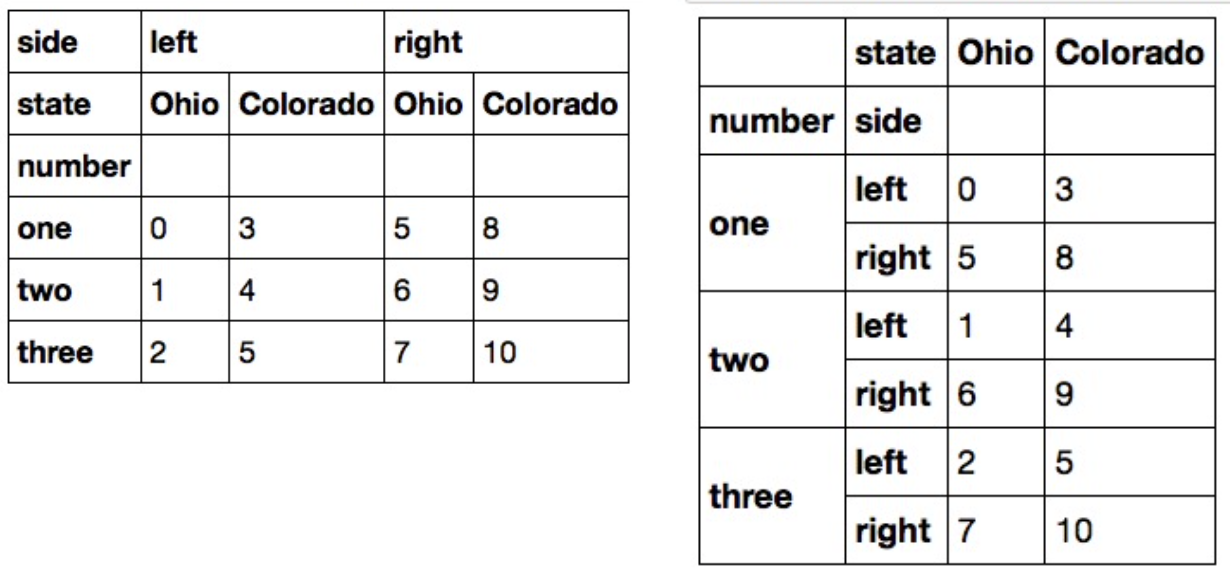

In [20]:
df = pd.DataFrame({'left': result, 'right': result + 5}, columns=pd.Index(['left', 'right'], name='side'))
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [22]:
k = df.stack()
k

state     number  side 
Ohio      one     left      0
                  right     5
          two     left      1
                  right     6
          three   left      2
                  right     7
Colorado  one     left      3
                  right     8
          two     left      4
                  right     9
          three   left      5
                  right    10
dtype: int64

In [25]:
k.unstack().unstack().unstack()

side   number  state   
left   one     Ohio         0
               Colorado     3
       two     Ohio         1
               Colorado     4
       three   Ohio         2
               Colorado     5
right  one     Ohio         5
               Colorado     8
       two     Ohio         6
               Colorado     9
       three   Ohio         7
               Colorado    10
dtype: int64

#### Solution

In [70]:
# df.unstack('state')
temp = df.unstack('state').stack('side')
temp

state         Colorado  Ohio
number side                 
one    left          3     0
       right         8     5
two    left          4     1
       right         9     6
three  left          5     2
       right        10     7

In [76]:
temp.loc['one']['Colorado'].loc['left']

3

Pivoting simple example

In [81]:
ldata = pd.DataFrame({'date': ['1959-03-31', '1959-03-31', '1959-03-31', '1959-06-30', '1959-06-30', '1959-06-30' ,'1959-09-30', '1959-09-30', '1959-09-30', '1959-12-31'],
                   'item': ['realgdp', 'infl', 'unemp', 'realgdp', 'infl', 'unemp', 'realgdp', 'infl', 'unemp', 'realgdp'],
                   'value': [2710.349, 0, 5.8, 2778.801, 2.34, 5.1, 2775.488, 2.74, 5.3, 2785.204]})
ldata

,date,item,value
0,1959-03-31,realgdp,2710.349
1,1959-03-31,infl,0.000
2,1959-03-31,unemp,5.800
3,1959-06-30,realgdp,2778.801
4,1959-06-30,infl,2.340
5,1959-06-30,unemp,5.100
6,1959-09-30,realgdp,2775.488
7,1959-09-30,infl,2.740
8,1959-09-30,unemp,5.300
9,1959-12-31,realgdp,2785.204


In [83]:
pivoted = ldata.pivot('date', 'item')
pivoted

value                
item        infl   realgdp unemp
date                            
1959-03-31  0.00  2710.349   5.8
1959-06-30  2.34  2778.801   5.1
1959-09-30  2.74  2775.488   5.3
1959-12-31   NaN  2785.204   NaN

### Exercise
- 주어진 ldata를 활용해 아래 예제 이미지와 유사하게 date와 item별 value, value2를 출력하시오
- 이 중, value에 해당하는 부분만 출력하시오
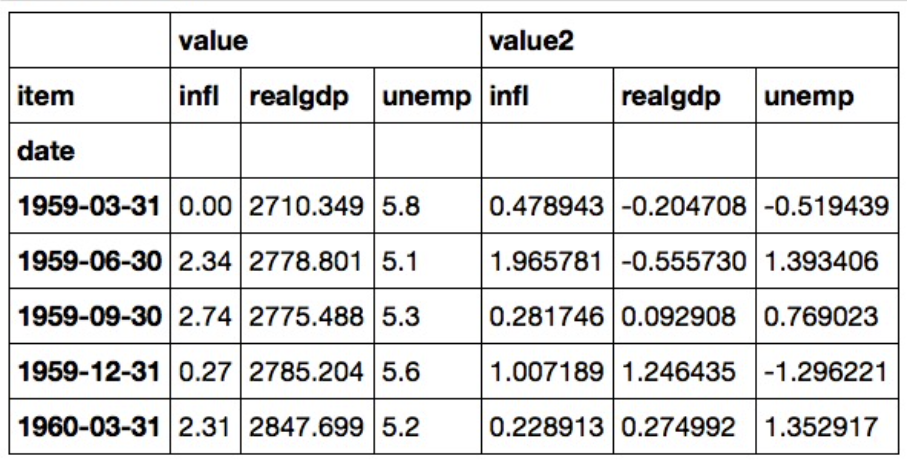

In [79]:
ldata = pd.DataFrame({'date': ['1959-03-31', '1959-03-31', '1959-03-31', '1959-06-30', '1959-06-30', '1959-06-30' ,'1959-09-30', '1959-09-30', '1959-09-30', '1959-12-31'],
                   'item': ['realgdp', 'infl', 'unemp', 'realgdp', 'infl', 'unemp', 'realgdp', 'infl', 'unemp', 'realgdp'],
                   'value': [2710.349, 0, 5.8, 2778.801, 2.34, 5.1, 2775.488, 2.74, 5.3, 2785.204],
                      'value2': [-0.204708, 0.478943, -0.519439, -0.555730, 1.965781, 1.393406, 0.092908, 0.281746, 0.769023, 1.246435]})
ldata

,date,item,value,value2
0,1959-03-31,realgdp,2710.349,-0.204708
1,1959-03-31,infl,0.000,0.478943
2,1959-03-31,unemp,5.800,-0.519439
3,1959-06-30,realgdp,2778.801,-0.555730
4,1959-06-30,infl,2.340,1.965781
5,1959-06-30,unemp,5.100,1.393406
6,1959-09-30,realgdp,2775.488,0.092908
7,1959-09-30,infl,2.740,0.281746
8,1959-09-30,unemp,5.300,0.769023
9,1959-12-31,realgdp,2785.204,1.246435


#### Solution

In [80]:
pivoted = ldata.pivot('date', 'item')
pivoted

value                    value2                    
item        infl   realgdp unemp      infl   realgdp     unemp
date                                                          
1959-03-31  0.00  2710.349   5.8  0.478943 -0.204708 -0.519439
1959-06-30  2.34  2778.801   5.1  1.965781 -0.555730  1.393406
1959-09-30  2.74  2775.488   5.3  0.281746  0.092908  0.769023
1959-12-31   NaN  2785.204   NaN       NaN  1.246435       NaN

## Data transformation

### Removing duplicates

In [84]:
df = pd.DataFrame({'k1': ['one','one','one','two','two','two','two'],
                   'k2': [1,1,2,3,3,4,4]})
df

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


컬럼 조합이 중복된 행을 지우시오.

In [289]:
df.drop_duplicates()

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


컬럼 조합이 중복된 행을 지우시오. 단, 지울 때 마지막 행을 남기시오.

In [85]:
# df.drop_duplicates(keep='last')
df.drop_duplicates(keep='first')

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


k1컬럼이 중복된 행을 지우시오.

In [86]:
# df.drop_duplicates(['k1'])
df.drop_duplicates(['k1'], keep='last')

,k1,k2
2,one,2
6,two,4


### Exercise

아래 주어진 df에서 k1과 k2 컬럼 조합이 중복된 지우시오.

In [87]:
df = pd.DataFrame({'k1': ['one','one','one','two','two','two','two'],
                   'k2': [1,1,2,3,3,4,4],
                   'v1': [0,1,2,3,4,5,6]})
df

,k1,k2,v1
0,one,1,0
1,one,1,1
2,one,2,2
3,two,3,3
4,two,3,4
5,two,4,5
6,two,4,6


#### Solution

In [88]:
df.drop_duplicates(['k1', 'k2'])

,k1,k2,v1
0,one,1,0
2,one,2,2
3,two,3,3
5,two,4,5


## Handling missing values

### Review
- Data elimination
- Data imputation

활용함수
- isnull: 결측치면 True, 아니면 False 반환
- notnull: 결측치가 아니면 True, 아니면 False 반환
- dropna: 결측치 포함 행, 열 제거
- fillna: 결측치 채움

주어진 데이터를 활용해 아래 주어진 문제를 푸시오.
- 1) 아래 DataFrame 내 결측치면 True, 아니면 False 반환
- 2) 열마다 결측치 개수 반환
- 3) 결측치 포함 행, 열 제거
- 4) 결측치를 1로 대체 (두 가지 방법 사용)

In [105]:
from io import StringIO

In [128]:
csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,,12.0,'''

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,NaN,12.0,NaN


In [129]:
# 1) 
df.isnull()

,A,B,C,D
0,False,False,False,False
1,False,False,True,False
2,False,True,False,True


In [130]:
# 2) * .sum(1)의 경우 행마다 결측치 개수 반환
df.isnull().sum()

A    0
B    1
C    1
D    1
dtype: int64

In [136]:
# 3)
# df.dropna(inplace=True)
# df.dropna(how='all', inplace=True)# : 모두 nan일 경우 제거 / 기존 DataFrame에 반영
# df_dropped = df.dropna(thresh=3)# : 관측값이 thresh값 이하면 제거 --> 다시 확인 필요
df.dropna(subset=['C'])# : 특정 열 기준으로 제거

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,NaN,12.0,NaN


In [139]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,NaN,12.0,NaN


In [145]:
# 4) 
# df.fillna(1)
# df.fillna(method='ffill') : 전/후 관측값을 사용하여 삽입 (bfill, limit=2)
df.replace(np.nan, 1)# : 앞의 값을 뒤 값으로 변경
# df.replace(np.nan, 1)

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,1.0,8.0
2,10.0,1.0,12.0,1.0


## String manipulation

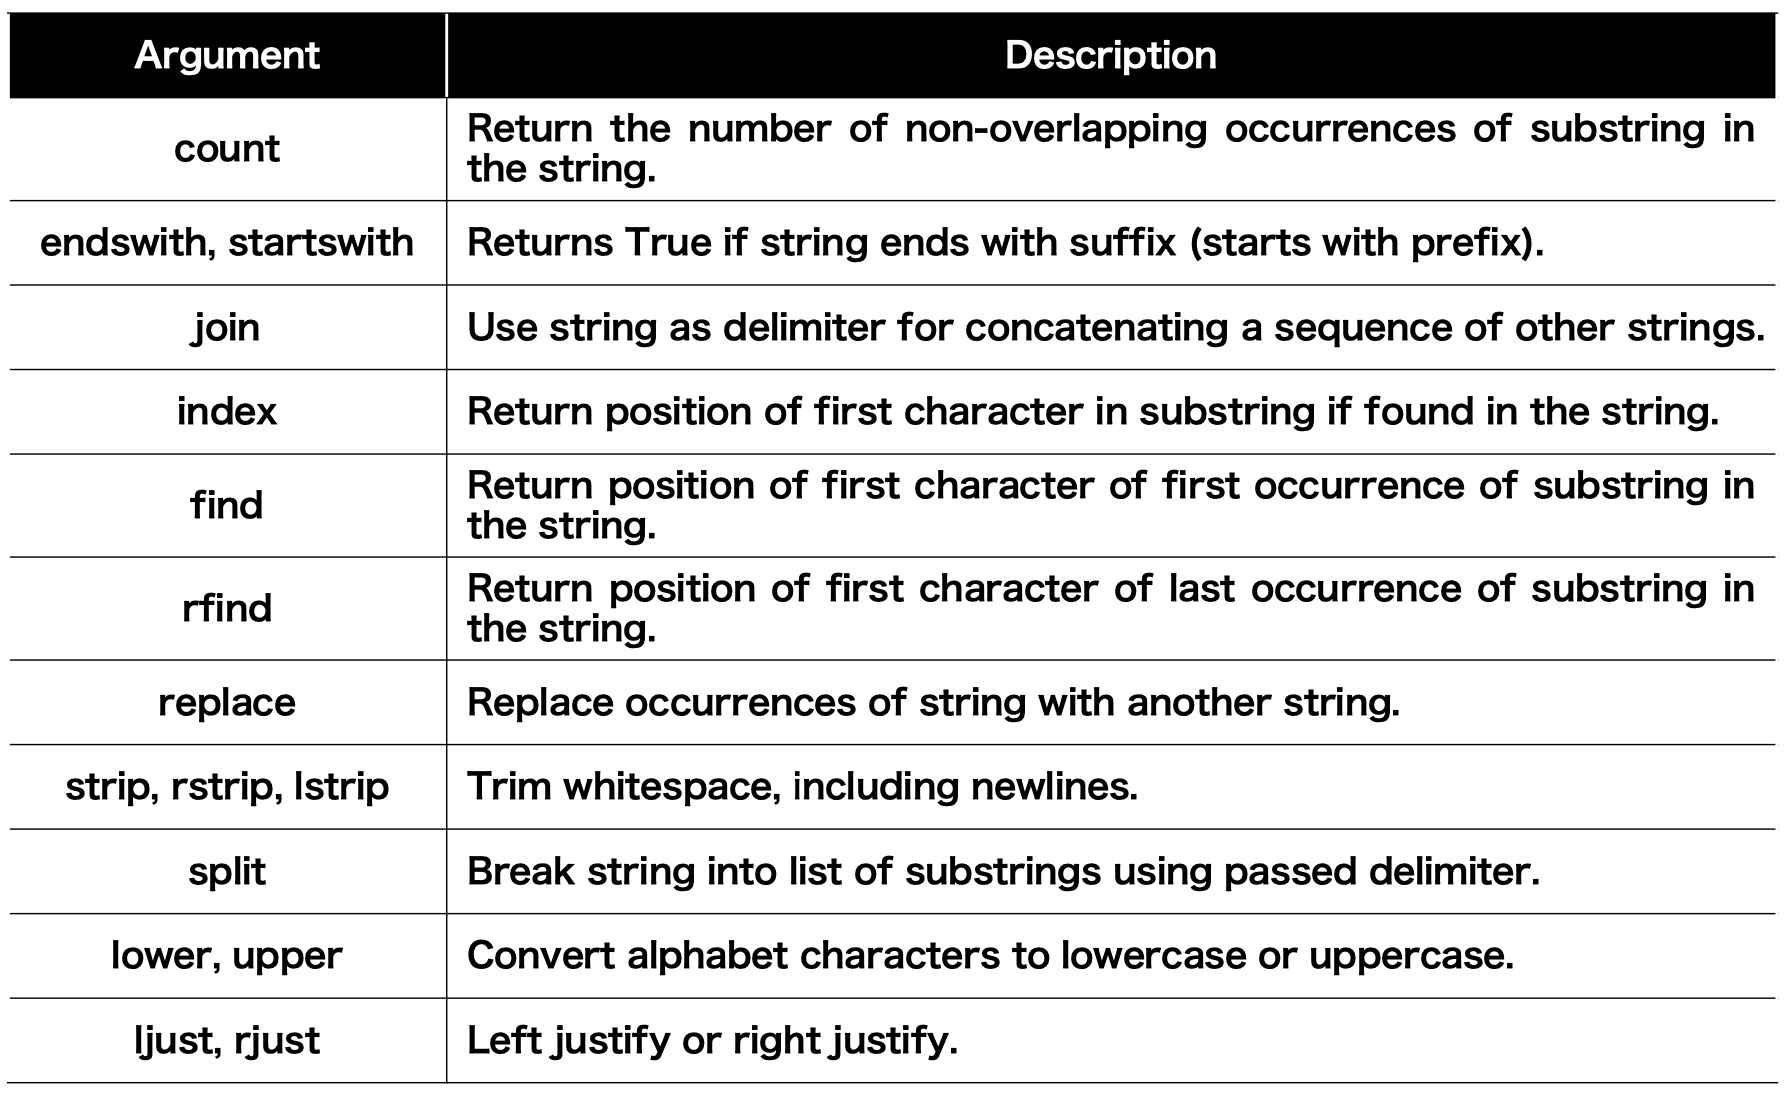

String manipulation examples

In [149]:
val = 'a,b, guido'
va2 = 'a:b: guido'

In [147]:
val.split(',')

['a', 'b', ' guido']

In [152]:
pieces = [x.strip() for x in val.split(',')]
pieces

['a', 'b', 'guido']

In [153]:
first, second, third = pieces
first + '\t' + second + '\t' + third

'a\tb\tguido'

In [302]:
'::'.join(pieces)

'a::b::guido'

In [154]:
','.join(pieces)

'a,b,guido'

In [155]:
val

'a,b, guido'

In [303]:
val.replace(',', ':::')

'a:::b::: guido'

### Exercise
아래 주어진 함수를 통해 얻어진 결과를 dataframe으로 변환하시오.

In [157]:
with open('data/tips.csv') as f:
    lines = f.readlines()

In [158]:
lines[:4]

['total_bill,tip,sex,smoker,day,time,size\n',
 '16.99,1.01,Female,No,Sun,Dinner,2\n',
 '10.34,1.66,Male,No,Sun,Dinner,3\n',
 '21.01,3.5,Male,No,Sun,Dinner,3\n']

#### Solution1

In [162]:
lines1 = []
for line in lines:
    lines1.append(line.replace('\n', ''))

In [164]:
lines2 = []
for line in lines1:
    lines2.append([val.strip() for val in line.split(',')])

In [166]:
lines2
header = lines2[0]
body = lines2[1:]

In [170]:
total_bill = []
tips = []
sex = []
for line in body:
    total_bill.append(line[0])
    tips.append(line[1])
    sex.append(line[2])

In [ ]:
obj = {}
for i in range(len(header)):
    obj[header[i]] = d2_arr[i]

In [178]:
pd.DataFrame({header[0]: total_bill, header[1]: tips, header[2]: sex})

,total_bill,tip,sex
0,16.99,1.01,Female
1,10.34,1.66,Male
2,21.01,3.5,Male
3,23.68,3.31,Male
4,24.59,3.61,Female
...,...,...,...
239,29.03,5.92,Male
240,27.18,2.0,Female
241,22.67,2.0,Male
242,17.82,1.75,Male


#### Solution2

In [ ]:
s1, s2, s3
series = [s1, s2, s3]
pd.concat(series)

In [179]:
series = []
for line in lines:
    series.append(pd.Series(line.split(',')))
df = pd.concat(series, axis=1)

In [183]:
df_t = df.T
df_t
header = df[0]
df_t = df_t[1:]

In [187]:
df_t.columns = header

In [188]:
df_t['size'] = df_t['size\n'].str.replace('\n', '')

In [190]:
df_t.pop('size\n')
df_t

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.5,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3
241,27.18,2.0,Female,Yes,Sat,Dinner,2
242,22.67,2.0,Male,Yes,Sat,Dinner,2
243,17.82,1.75,Male,No,Sat,Dinner,2


In [199]:
df = pd.DataFrame({'A_col': ['1. Ant.  ', '2. Bee!\n', '3. Cat?\t', np.nan],
              'B_col': ['1. Ant.  ', '2. Bee!\n', '3. Cat?\t', np.nan]})
df

,A_col,B_col
0,1. Ant.,1. Ant.
1,2. Bee!\n,2. Bee!\n
2,3. Cat?\t,3. Cat?\t
3,NaN,NaN


In [203]:
df['A_col_revised'] = df['A_col'].str.strip('\t')

In [204]:
df

,A_col,B_col,A_col_revised
0,1. Ant.,1. Ant.,1. Ant.
1,2. Bee!\n,2. Bee!\n,2. Bee!\n
2,3. Cat?\t,3. Cat?\t,3. Cat?
3,NaN,NaN,NaN


----------------------------------------------------------------------------------------------

# Data Wrangling Exercise

We assume that you have already download the dataset. Please read the data files.

In [254]:
df = pd.read_csv('data/sampled.csv')
df

,Unnamed: 0,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,348850,C00430470,P80002801,"McCain, John S","FINCH, ELIZABETH G. MRS.",HOUSTON,TX,770564206,RETIRED,RETIRED,17500.0,1.May.08,NaN,NaN,NaN,SA17A,364148
1,1084984,C00431445,P80003338,"Obama, Barack","MIELE, SUSANNA H",PASADENA,CA,911063557,NOT EMPLOYED,RETIRED,100.0,16.Oct.08,NaN,NaN,NaN,SA17A,754317
2,1355519,C00431445,P80003338,"Obama, Barack","KRONENBERGER, ANN",WASHINGTON,DC,200122065,NSGI,COMPUTER CONSULTANT,250.0,13.Oct.08,NaN,NaN,NaN,SA17A,753776
3,2945,C00430470,P80002801,"McCain, John S","DRUMMOND, ELBERT A. MR.",JASPER,AL,355021549,DRUMMOND COMPANY INC.,EXECUTIVE,24000.0,28.Apr.08,NaN,NaN,NaN,SA17A,364146
4,2393612,C00431445,P80003338,"Obama, Barack","JEROME, CYNTHIA",POUND RIDGE,NY,105762115,ENT & ALLERGY ASSOCIATES,PHYSICIAN,100.0,7.May.08,NaN,NaN,NaN,SA17A,753674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4089,613165,C00431205,P40002347,"Edwards, John","BOWMAN, MAUREEN",PLYMOUTH,MN,554421249,LEMHI VENTURES,OFFICE MANAGER,50.0,26.Sep.07,NaN,NaN,NaN,SA17A,317641
4090,2171015,C00431445,P80003338,"Obama, Barack","PARNELL, ELLEN",GREENWOOD,MS,389304112,NOT EMPLOYED,RETIRED,25.0,31.Oct.08,NaN,NaN,NaN,SA17A,754317
4091,2023417,C00431445,P80003338,"Obama, Barack","SKINNER, DONNA",UPPER MARLBORO,MD,207749443,WCS,ACCTS PAYABLE,-20.0,18.Jun.08,REDESIGNATION FROM,NaN,REDESIGNATION FROM,SA17A,753769
4092,3416038,C00431569,P00003392,"Clinton, Hillary Rodham","HAYDEN, PATRICE",WASHINGTON,DC,200085628,BRYAN CAVE LLP,ATTORNEY,25.0,18.May.07,NaN,NaN,NaN,SA17A,392796


Q1) Remove duplicates

In [207]:
df.drop_duplicates()

,Unnamed: 0,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,348850,C00430470,P80002801,"McCain, John S","FINCH, ELIZABETH G. MRS.",HOUSTON,TX,770564206,RETIRED,RETIRED,17500.0,1.May.08,NaN,NaN,NaN,SA17A,364148
1,1084984,C00431445,P80003338,"Obama, Barack","MIELE, SUSANNA H",PASADENA,CA,911063557,NOT EMPLOYED,RETIRED,100.0,16.Oct.08,NaN,NaN,NaN,SA17A,754317
2,1355519,C00431445,P80003338,"Obama, Barack","KRONENBERGER, ANN",WASHINGTON,DC,200122065,NSGI,COMPUTER CONSULTANT,250.0,13.Oct.08,NaN,NaN,NaN,SA17A,753776
3,2945,C00430470,P80002801,"McCain, John S","DRUMMOND, ELBERT A. MR.",JASPER,AL,355021549,DRUMMOND COMPANY INC.,EXECUTIVE,24000.0,28.Apr.08,NaN,NaN,NaN,SA17A,364146
4,2393612,C00431445,P80003338,"Obama, Barack","JEROME, CYNTHIA",POUND RIDGE,NY,105762115,ENT & ALLERGY ASSOCIATES,PHYSICIAN,100.0,7.May.08,NaN,NaN,NaN,SA17A,753674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3595125,C00431569,P00003392,"Clinton, Hillary Rodham","KASAKOFF, LAURA",NUTLEY,NJ,71102748,AOL TIME WARNER,DELIVERY MANAGER,11.0,27.Mar.08,NaN,NaN,NaN,SA17A,341838
3996,2860053,C00431445,P80003338,"Obama, Barack","JABLIN, BURTON",KNOXVILLE,TN,379194617,SCRIPPS NETWORKS,TELEVISION EXECUTIVE,300.0,6.Feb.08,NaN,NaN,NaN,SA17A,360401
3997,2550247,C00431445,P80003338,"Obama, Barack","COMET, HOWARD",BROOKLYN,NY,112152208,"WEIL, GOTSHAL & MANGES LLP",LAWYER,1000.0,2.Oct.08,NaN,NaN,NaN,SA17A,753776
3998,1138463,C00431445,P80003338,"Obama, Barack","MCGINN, AVERY",SAN FRANCISCO,CA,941072819,SELF EMPLOYED,BUSINESS OWNER,100.0,27.Sep.08,NaN,NaN,NaN,SA17A,753817


Q2) Is there duplicated values in 'Unnamed: 0'.

In [209]:
df.duplicated(['Unnamed: 0']).sum()

100

Q3) If there are duplicated values in 'Unnamed: 0', please delete them.

In [211]:
df.drop_duplicates(['Unnamed: 0'])

,Unnamed: 0,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,348850,C00430470,P80002801,"McCain, John S","FINCH, ELIZABETH G. MRS.",HOUSTON,TX,770564206,RETIRED,RETIRED,17500.0,1.May.08,NaN,NaN,NaN,SA17A,364148
1,1084984,C00431445,P80003338,"Obama, Barack","MIELE, SUSANNA H",PASADENA,CA,911063557,NOT EMPLOYED,RETIRED,100.0,16.Oct.08,NaN,NaN,NaN,SA17A,754317
2,1355519,C00431445,P80003338,"Obama, Barack","KRONENBERGER, ANN",WASHINGTON,DC,200122065,NSGI,COMPUTER CONSULTANT,250.0,13.Oct.08,NaN,NaN,NaN,SA17A,753776
3,2945,C00430470,P80002801,"McCain, John S","DRUMMOND, ELBERT A. MR.",JASPER,AL,355021549,DRUMMOND COMPANY INC.,EXECUTIVE,24000.0,28.Apr.08,NaN,NaN,NaN,SA17A,364146
4,2393612,C00431445,P80003338,"Obama, Barack","JEROME, CYNTHIA",POUND RIDGE,NY,105762115,ENT & ALLERGY ASSOCIATES,PHYSICIAN,100.0,7.May.08,NaN,NaN,NaN,SA17A,753674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3595125,C00431569,P00003392,"Clinton, Hillary Rodham","KASAKOFF, LAURA",NUTLEY,NJ,71102748,AOL TIME WARNER,DELIVERY MANAGER,11.0,27.Mar.08,NaN,NaN,NaN,SA17A,341838
3996,2860053,C00431445,P80003338,"Obama, Barack","JABLIN, BURTON",KNOXVILLE,TN,379194617,SCRIPPS NETWORKS,TELEVISION EXECUTIVE,300.0,6.Feb.08,NaN,NaN,NaN,SA17A,360401
3997,2550247,C00431445,P80003338,"Obama, Barack","COMET, HOWARD",BROOKLYN,NY,112152208,"WEIL, GOTSHAL & MANGES LLP",LAWYER,1000.0,2.Oct.08,NaN,NaN,NaN,SA17A,753776
3998,1138463,C00431445,P80003338,"Obama, Barack","MCGINN, AVERY",SAN FRANCISCO,CA,941072819,SELF EMPLOYED,BUSINESS OWNER,100.0,27.Sep.08,NaN,NaN,NaN,SA17A,753817


Q4) Remove outliers in 'contb_receipt_amt'

In [233]:
pd.concat([df['contb_receipt_amt'][:4091], df['contb_receipt_amt'][4092:]])

0       17500.0
1         100.0
2         250.0
3       24000.0
4         100.0
         ...   
4088      100.0
4089       50.0
4090       25.0
4092       25.0
4093       25.0
Name: contb_receipt_amt, Length: 4093, dtype: float64

In [215]:
# print(df['contb_receipt_amt'].mean())
# print(df['contb_receipt_amt'].std)

In [ ]:
df[np.abs(df.contb_recipt_amt - df.contb_receipt_amt.mean())
   > df.contb_receipt_amt.std() * 3] = np.nan

In [252]:
df[np.abs(df.contb_receipt_amt - df.contb_receipt_amt.mean()) <= df.contb_receipt_amt.std() * 3]

,Unnamed: 0,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
1,1084984.0,C00431445,P80003338,"Obama, Barack","MIELE, SUSANNA H",PASADENA,CA,911063557,NOT EMPLOYED,RETIRED,100.0,16.Oct.08,NaN,NaN,NaN,SA17A,754317.0
2,1355519.0,C00431445,P80003338,"Obama, Barack","KRONENBERGER, ANN",WASHINGTON,DC,200122065,NSGI,COMPUTER CONSULTANT,250.0,13.Oct.08,NaN,NaN,NaN,SA17A,753776.0
4,2393612.0,C00431445,P80003338,"Obama, Barack","JEROME, CYNTHIA",POUND RIDGE,NY,105762115,ENT & ALLERGY ASSOCIATES,PHYSICIAN,100.0,7.May.08,NaN,NaN,NaN,SA17A,753674.0
5,2308241.0,C00431445,P80003338,"Obama, Barack","MCCORMICK, FRANK",WILLIAMSTOWN,NJ,80942127,"HUNGERFORD & TERRY, INC.",TECHNICAL WRITER,50.0,7.Oct.08,NaN,NaN,NaN,SA17A,753776.0
6,867708.0,C00431445,P80003338,"Obama, Barack","MCKOWN, DONNA",STUDIO CITY,CA,916042864,SELTZER FONTAINE BECKWITH,ADMIN ASST,50.0,16.Jul.08,NaN,NaN,NaN,SA17A,753761.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4089,613165.0,C00431205,P40002347,"Edwards, John","BOWMAN, MAUREEN",PLYMOUTH,MN,554421249,LEMHI VENTURES,OFFICE MANAGER,50.0,26.Sep.07,NaN,NaN,NaN,SA17A,317641.0
4090,2171015.0,C00431445,P80003338,"Obama, Barack","PARNELL, ELLEN",GREENWOOD,MS,389304112,NOT EMPLOYED,RETIRED,25.0,31.Oct.08,NaN,NaN,NaN,SA17A,754317.0
4091,2023417.0,C00431445,P80003338,"Obama, Barack","SKINNER, DONNA",UPPER MARLBORO,MD,207749443,WCS,ACCTS PAYABLE,-20.0,18.Jun.08,REDESIGNATION FROM,NaN,REDESIGNATION FROM,SA17A,753769.0
4092,3416038.0,C00431569,P00003392,"Clinton, Hillary Rodham","HAYDEN, PATRICE",WASHINGTON,DC,200085628,BRYAN CAVE LLP,ATTORNEY,25.0,18.May.07,NaN,NaN,NaN,SA17A,392796.0


In [ ]:
df.dropna(ho)

In [ ]:
df2 = df.dropna(how='all')
df2

Q5) Change the nagative values in 'contb_receipt_amt' with 0

In [259]:
len(df[df['contb_receipt_amt'] < 0])

136

In [261]:
df.loc[(df.contb_receipt_amt < 0), 'contb_receipt_amt'] = 0

In [262]:
len(df[df['contb_receipt_amt'] < 0])

0

Q6) Make the names of columns capital

In [266]:
df.columns = map(str.upper, df.columns)
df

,UNNAMED: 0,CMTE_ID,CAND_ID,CAND_NM,CONTBR_NM,CONTBR_CITY,CONTBR_ST,CONTBR_ZIP,CONTBR_EMPLOYER,CONTBR_OCCUPATION,CONTB_RECEIPT_AMT,CONTB_RECEIPT_DT,RECEIPT_DESC,MEMO_CD,MEMO_TEXT,FORM_TP,FILE_NUM
0,348850,C00430470,P80002801,"McCain, John S","FINCH, ELIZABETH G. MRS.",HOUSTON,TX,770564206,RETIRED,RETIRED,0.0,1.May.08,NaN,NaN,NaN,SA17A,364148
1,1084984,C00431445,P80003338,"Obama, Barack","MIELE, SUSANNA H",PASADENA,CA,911063557,NOT EMPLOYED,RETIRED,100.0,16.Oct.08,NaN,NaN,NaN,SA17A,754317
2,1355519,C00431445,P80003338,"Obama, Barack","KRONENBERGER, ANN",WASHINGTON,DC,200122065,NSGI,COMPUTER CONSULTANT,250.0,13.Oct.08,NaN,NaN,NaN,SA17A,753776
3,2945,C00430470,P80002801,"McCain, John S","DRUMMOND, ELBERT A. MR.",JASPER,AL,355021549,DRUMMOND COMPANY INC.,EXECUTIVE,0.0,28.Apr.08,NaN,NaN,NaN,SA17A,364146
4,2393612,C00431445,P80003338,"Obama, Barack","JEROME, CYNTHIA",POUND RIDGE,NY,105762115,ENT & ALLERGY ASSOCIATES,PHYSICIAN,100.0,7.May.08,NaN,NaN,NaN,SA17A,753674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4089,613165,C00431205,P40002347,"Edwards, John","BOWMAN, MAUREEN",PLYMOUTH,MN,554421249,LEMHI VENTURES,OFFICE MANAGER,50.0,26.Sep.07,NaN,NaN,NaN,SA17A,317641
4090,2171015,C00431445,P80003338,"Obama, Barack","PARNELL, ELLEN",GREENWOOD,MS,389304112,NOT EMPLOYED,RETIRED,25.0,31.Oct.08,NaN,NaN,NaN,SA17A,754317
4091,2023417,C00431445,P80003338,"Obama, Barack","SKINNER, DONNA",UPPER MARLBORO,MD,207749443,WCS,ACCTS PAYABLE,0.0,18.Jun.08,REDESIGNATION FROM,NaN,REDESIGNATION FROM,SA17A,753769
4092,3416038,C00431569,P00003392,"Clinton, Hillary Rodham","HAYDEN, PATRICE",WASHINGTON,DC,200085628,BRYAN CAVE LLP,ATTORNEY,25.0,18.May.07,NaN,NaN,NaN,SA17A,392796


Q7) Make bins (the size is 10) for 'contb_receipt_amt' and draw a histogram.

In [270]:
from matplotlib import pyplot as plt

In [272]:
df.columns

Index(['UNNAMED: 0', 'CMTE_ID', 'CAND_ID', 'CAND_NM', 'CONTBR_NM',
       'CONTBR_CITY', 'CONTBR_ST', 'CONTBR_ZIP', 'CONTBR_EMPLOYER',
       'CONTBR_OCCUPATION', 'CONTB_RECEIPT_AMT', 'CONTB_RECEIPT_DT',
       'RECEIPT_DESC', 'MEMO_CD', 'MEMO_TEXT', 'FORM_TP', 'FILE_NUM'],
      dtype='object')

In [277]:
np.arange(min(df.CONTB_RECEIPT_AMT),max(df.CONTB_RECEIPT_AMT),10)

array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
         90.,  100.,  110.,  120.,  130.,  140.,  150.,  160.,  170.,
        180.,  190.,  200.,  210.,  220.,  230.,  240.,  250.,  260.,
        270.,  280.,  290.,  300.,  310.,  320.,  330.,  340.,  350.,
        360.,  370.,  380.,  390.,  400.,  410.,  420.,  430.,  440.,
        450.,  460.,  470.,  480.,  490.,  500.,  510.,  520.,  530.,
        540.,  550.,  560.,  570.,  580.,  590.,  600.,  610.,  620.,
        630.,  640.,  650.,  660.,  670.,  680.,  690.,  700.,  710.,
        720.,  730.,  740.,  750.,  760.,  770.,  780.,  790.,  800.,
        810.,  820.,  830.,  840.,  850.,  860.,  870.,  880.,  890.,
        900.,  910.,  920.,  930.,  940.,  950.,  960.,  970.,  980.,
        990., 1000., 1010., 1020., 1030., 1040., 1050., 1060., 1070.,
       1080., 1090., 1100., 1110., 1120., 1130., 1140., 1150., 1160.,
       1170., 1180., 1190., 1200., 1210., 1220., 1230., 1240., 1250.,
       1260., 1270.,

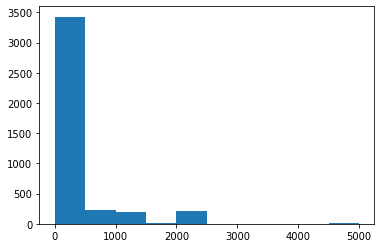

In [278]:
plt.hist(df.CONTB_RECEIPT_AMT, bins=10)
plt.show()

Q8) Select a random subset without replacement. (sample size = 300)

In [ ]:
dataframe.take()

Q9) Select a random subset with replacement. (sample size = 300)

In [ ]:
dataframe.take()